# Dimension Reduction

## Imports

In [219]:
pip install umap-learn

   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.7 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 967.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [233]:
import umap.umap_ as umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Functions

In [236]:
def plot_pca(pca_features):
    plt.scatter(pca_features[:, 0], pca_features[:, 1])
    plt.title('2D Projection of Data after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

In [238]:
def plot_tsne(tsne_features):
    plt.scatter(tsne_features[:, 0], tsne_features[:, 1])
    plt.title('t-SNE Visualization')
    plt.show()

In [240]:
def plot_umap(umap_features):
    plt.scatter(umap_features[:, 0], umap_features[:, 1])
    plt.title('UMAP Visualization')
    plt.show()

## Load the Data

In [243]:
df = pd.read_csv('erBeforeHospitalization.csv')

In [244]:
df

,Patient,Admission_Medical_Record,Admission_Entry_Date,Release_Date,מחלקה מאשפזת1,Medical_Record,ev_Admission_Date,ev_Release_Time,דרך הגעה למיון,מיון,urgencyLevelTime,אבחנות במיון,codeDoctor,Admission_Medical_Record2,Admission_Entry_Date2,Release_Date2,מחלקה מאשפזת2
0,1043772,7237062,2023-11-24 15:50:11.060000,2023-11-26 15:00:00,3,7264965,2023-12-05 11:58:00,2023-12-05 21:08:00,נהג אמבולנס,מיון פנימי,3,7860,1296,7266393,2023-12-05 21:13:49.920000,2023-12-08 11:46:00,3
1,1043772,7237062,2023-11-24 15:50:11.060000,2023-11-26 15:00:00,3,7307847,2023-12-21 10:35:00,2023-12-21 15:21:00,Not provided,מיון פנימי,2,"2859 , 7860",2294,7309258,2023-12-21 15:21:57.077000,2023-12-27 13:46:00,3
2,1043772,7266393,2023-12-05 21:13:49.920000,2023-12-08 11:46:00,3,7307847,2023-12-21 10:35:00,2023-12-21 15:21:00,Not provided,מיון פנימי,2,"2859 , 7860",2294,7309258,2023-12-21 15:21:57.077000,2023-12-27 13:46:00,3
3,1043772,7266393,2023-12-05 21:13:49.920000,2023-12-08 11:46:00,3,1000000,1900-01-01 00:00:00,1900-01-01 00:00:00,No Emergency Visit,No Emergency Visit,0,0,0,7330659,2023-12-30 21:44:35.313000,2023-12-31 14:36:00,3
4,1043772,7309258,2023-12-21 15:21:57.077000,2023-12-27 13:46:00,3,1000000,1900-01-01 00:00:00,1900-01-01 00:00:00,No Emergency Visit,No Emergency Visit,0,0,0,7330659,2023-12-30 21:44:35.313000,2023-12-31 14:36:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,769513,5025682,2021-06-22 12:46:23.813000,2021-06-23 18:43:00,4,5080790,2021-07-13 14:17:00,2021-07-13 18:34:00,לבד,מיון כירורגי,4,2859,8706,5081325,2021-07-13 18:59:50.437000,2021-07-14 17:28:00,4
9105,769513,5081325,2021-07-13 18:59:50.437000,2021-07-14 17:28:00,4,5097259,2021-07-20 04:48:00,2021-07-20 09:29:00,לבד,מיון פנימי,4,7860,11639,5098541,2021-07-20 11:05:40.627000,2021-07-22 15:21:00,4
9106,769513,5081325,2021-07-13 18:59:50.437000,2021-07-14 17:28:00,4,5124754,2021-07-29 20:34:00,2021-07-30 01:37:00,Not provided,מיון פנימי,4,"586 , 7860",10014,5125850,2021-07-30 05:16:38.543000,2021-08-10 15:08:00,4
9107,769513,5098541,2021-07-20 11:05:40.627000,2021-07-22 15:21:00,4,5124754,2021-07-29 20:34:00,2021-07-30 01:37:00,Not provided,מיון פנימי,4,"586 , 7860",10014,5125850,2021-07-30 05:16:38.543000,2021-08-10 15:08:00,4


Check for null values

In [248]:
np.sum(df.isnull(), axis = 0)

Patient                      0
Admission_Medical_Record     0
Admission_Entry_Date         0
Release_Date                 0
מחלקה מאשפזת1                0
Medical_Record               0
ev_Admission_Date            0
ev_Release_Time              0
דרך הגעה למיון               0
מיון                         0
urgencyLevelTime             0
אבחנות במיון                 0
codeDoctor                   0
Admission_Medical_Record2    0
Admission_Entry_Date2        0
Release_Date2                0
מחלקה מאשפזת2                0
dtype: int64

Translate hebrew column names to english

In [251]:
df_copy = df
df_copy.rename(columns={'מחלקה מאשפזת1': 'Hospitalizing_Department1'}, inplace=True)
df_copy.rename(columns={'דרך הגעה למיון': 'Arrival_To_ER'}, inplace=True)
df_copy.rename(columns={'מיון': 'ER'}, inplace=True)
df_copy.rename(columns={'אבחנות במיון': 'ER_Diagnosis'}, inplace=True)
df_copy.rename(columns={'מחלקה מאשפזת2': 'Hospitalizing_Department2'}, inplace=True)

Change datetime to be only dates

In [254]:
df_copy['ev_Release_Time'] = pd.to_datetime(df_copy['ev_Release_Time']).dt.date
df_copy['ev_Admission_Date'] = pd.to_datetime(df_copy['ev_Admission_Date']).dt.date
df_copy['Release_Date'] = pd.to_datetime(df_copy['Release_Date']).dt.date
df_copy['Release_Date2'] = pd.to_datetime(df_copy['Release_Date2']).dt.date
df_copy['Admission_Entry_Date'] = pd.to_datetime(df_copy['Admission_Entry_Date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df_copy['Admission_Entry_Date'] = pd.to_datetime(df_copy['Admission_Entry_Date']).dt.date
df_copy['Admission_Entry_Date2'] = pd.to_datetime(df_copy['Admission_Entry_Date2'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df_copy['Admission_Entry_Date2'] = pd.to_datetime(df_copy['Admission_Entry_Date2']).dt.date

In [255]:
df_copy

,Patient,Admission_Medical_Record,Admission_Entry_Date,Release_Date,Hospitalizing_Department1,Medical_Record,ev_Admission_Date,ev_Release_Time,Arrival_To_ER,ER,urgencyLevelTime,ER_Diagnosis,codeDoctor,Admission_Medical_Record2,Admission_Entry_Date2,Release_Date2,Hospitalizing_Department2
0,1043772,7237062,2023-11-24,2023-11-26,3,7264965,2023-12-05,2023-12-05,נהג אמבולנס,מיון פנימי,3,7860,1296,7266393,2023-12-05,2023-12-08,3
1,1043772,7237062,2023-11-24,2023-11-26,3,7307847,2023-12-21,2023-12-21,Not provided,מיון פנימי,2,"2859 , 7860",2294,7309258,2023-12-21,2023-12-27,3
2,1043772,7266393,2023-12-05,2023-12-08,3,7307847,2023-12-21,2023-12-21,Not provided,מיון פנימי,2,"2859 , 7860",2294,7309258,2023-12-21,2023-12-27,3
3,1043772,7266393,2023-12-05,2023-12-08,3,1000000,1900-01-01,1900-01-01,No Emergency Visit,No Emergency Visit,0,0,0,7330659,2023-12-30,2023-12-31,3
4,1043772,7309258,2023-12-21,2023-12-27,3,1000000,1900-01-01,1900-01-01,No Emergency Visit,No Emergency Visit,0,0,0,7330659,2023-12-30,2023-12-31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,769513,5025682,2021-06-22,2021-06-23,4,5080790,2021-07-13,2021-07-13,לבד,מיון כירורגי,4,2859,8706,5081325,2021-07-13,2021-07-14,4
9105,769513,5081325,2021-07-13,2021-07-14,4,5097259,2021-07-20,2021-07-20,לבד,מיון פנימי,4,7860,11639,5098541,2021-07-20,2021-07-22,4
9106,769513,5081325,2021-07-13,2021-07-14,4,5124754,2021-07-29,2021-07-30,Not provided,מיון פנימי,4,"586 , 7860",10014,5125850,2021-07-30,2021-08-10,4
9107,769513,5098541,2021-07-20,2021-07-22,4,5124754,2021-07-29,2021-07-30,Not provided,מיון פנימי,4,"586 , 7860",10014,5125850,2021-07-30,2021-08-10,4


We will now drop columns that are irrelevant for the research question, such as patient number.

In [259]:
df_copy.drop(columns = ['Patient', 'Admission_Medical_Record', 'Medical_Record', 'Admission_Medical_Record2'], inplace=True)

In [260]:
df_copy

,Admission_Entry_Date,Release_Date,Hospitalizing_Department1,ev_Admission_Date,ev_Release_Time,Arrival_To_ER,ER,urgencyLevelTime,ER_Diagnosis,codeDoctor,Admission_Entry_Date2,Release_Date2,Hospitalizing_Department2
0,2023-11-24,2023-11-26,3,2023-12-05,2023-12-05,נהג אמבולנס,מיון פנימי,3,7860,1296,2023-12-05,2023-12-08,3
1,2023-11-24,2023-11-26,3,2023-12-21,2023-12-21,Not provided,מיון פנימי,2,"2859 , 7860",2294,2023-12-21,2023-12-27,3
2,2023-12-05,2023-12-08,3,2023-12-21,2023-12-21,Not provided,מיון פנימי,2,"2859 , 7860",2294,2023-12-21,2023-12-27,3
3,2023-12-05,2023-12-08,3,1900-01-01,1900-01-01,No Emergency Visit,No Emergency Visit,0,0,0,2023-12-30,2023-12-31,3
4,2023-12-21,2023-12-27,3,1900-01-01,1900-01-01,No Emergency Visit,No Emergency Visit,0,0,0,2023-12-30,2023-12-31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2021-06-22,2021-06-23,4,2021-07-13,2021-07-13,לבד,מיון כירורגי,4,2859,8706,2021-07-13,2021-07-14,4
9105,2021-07-13,2021-07-14,4,2021-07-20,2021-07-20,לבד,מיון פנימי,4,7860,11639,2021-07-20,2021-07-22,4
9106,2021-07-13,2021-07-14,4,2021-07-29,2021-07-30,Not provided,מיון פנימי,4,"586 , 7860",10014,2021-07-30,2021-08-10,4
9107,2021-07-20,2021-07-22,4,2021-07-29,2021-07-30,Not provided,מיון פנימי,4,"586 , 7860",10014,2021-07-30,2021-08-10,4


There are no numeric columns, so we will just encode every column and not scale them.

In [262]:
df_copy.dropna(inplace=True)

In [263]:
label_encoder = LabelEncoder()

## Dimension Reduction with PCA

In [265]:
for col in df_copy.columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [270]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_copy)

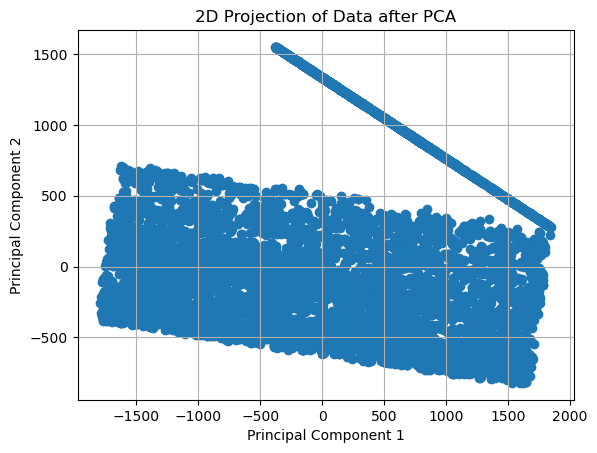

In [272]:
plot_pca(pca_features)

In [273]:
explained_variance = pca.explained_variance_ratio_.sum()
explained_variance

0.9464554999068426

Attempt to create PCA without the date time features

In [276]:
df_test = df_copy.drop(columns = ['Admission_Entry_Date', 'Release_Date', 'ev_Release_Time', 'ev_Admission_Date', 'Admission_Entry_Date2', 'Release_Date2'])

In [280]:
for col in df_test.columns:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [282]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_test)

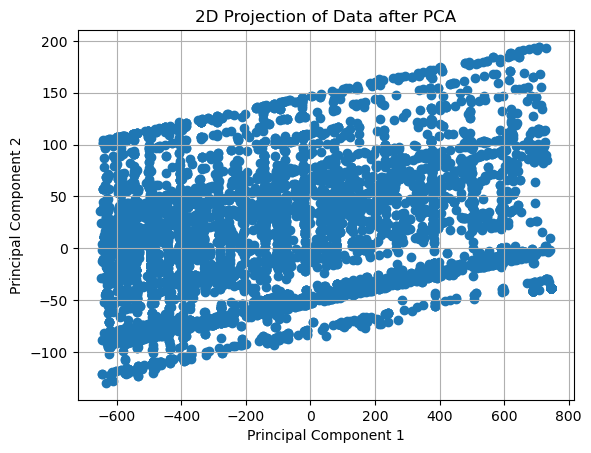

In [284]:
plot_pca(pca_features)

In [286]:
explained_variance = pca.explained_variance_ratio_.sum()
explained_variance

0.9999566342903103

We can see that performing PCA without the dates gives explained variance of 99.9%. This means that the principal components explain the predictors almost perfectly.

## Dimension Reduction with t-SNE

In [185]:
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(df_copy)

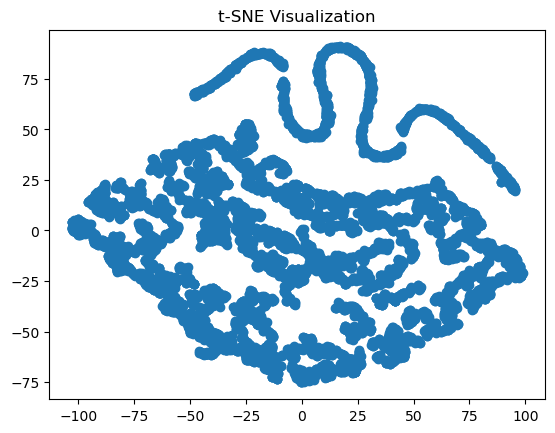

In [192]:
plot_tsne(tsne_features)

In [194]:
tsne = TSNE(n_components=2)
tsne_features = tsne.fit_transform(df_test)

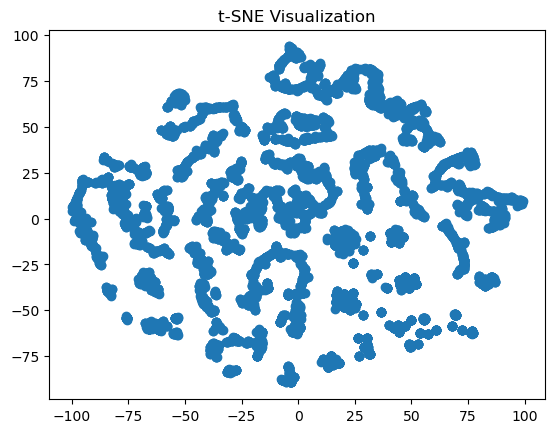

In [195]:
plot_tsne(tsne_features)

## Dimension Reduction with UMAP

In [223]:
reducer = umap.UMAP(n_components=2)
umap_features = reducer.fit_transform(df_copy)

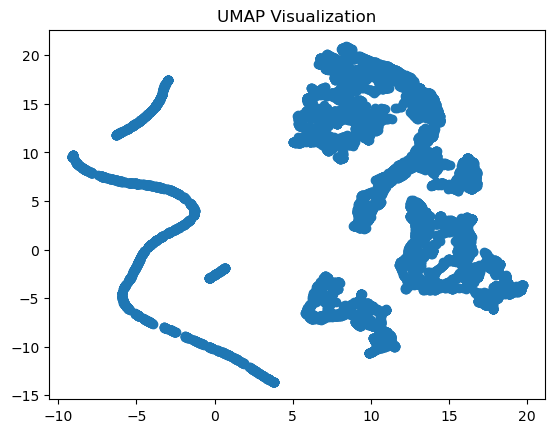

In [224]:
plot_umap(umap_features)

In [225]:
reducer = umap.UMAP(n_components=2)
umap_features = reducer.fit_transform(df_test)

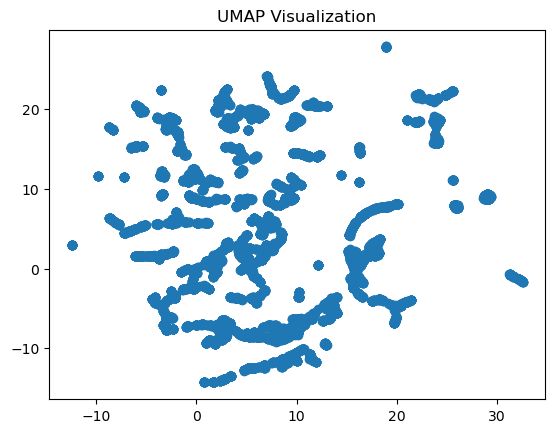

In [226]:
plot_umap(umap_features)